In [1]:
import pandas as pd
import numpy as mp
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('Data/cancer_classification.csv')

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


<AxesSubplot:xlabel='benign_0__mal_1', ylabel='count'>

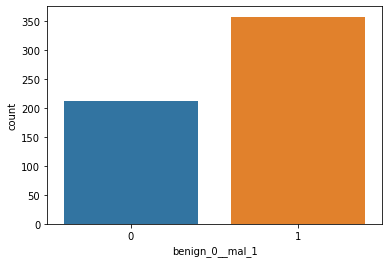

In [7]:
sns.countplot(x='benign_0__mal_1',data=df)

In [15]:
df.corr()['benign_0__mal_1'].sort_values()

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

In [17]:
X = df.drop('benign_0__mal_1',axis=1).values
y = df['benign_0__mal_1'].values

In [18]:
from sklearn.model_selection import train_test_split


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [20]:
from sklearn.preprocessing import MinMaxScaler

In [21]:
scaler = MinMaxScaler()

In [22]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
from tensorflow.keras.models import Sequential

In [24]:
from tensorflow.keras.layers import Dense, Dropout

In [26]:
X_train.shape

(426, 30)

In [27]:
model = Sequential()
model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(1,activation='sigmoid')) #binary classification
model.compile(loss='binary_crossentropy',optimizer = 'adam')


In [28]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test))

Epoch 1/600
14/14 [==============================] - 0s 12ms/step - loss: 0.6704 - val_loss: 0.6481
Epoch 2/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6236 - val_loss: 0.6040
Epoch 3/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5779 - val_loss: 0.5561
Epoch 4/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5312 - val_loss: 0.5077
Epoch 5/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4856 - val_loss: 0.4598
Epoch 6/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4385 - val_loss: 0.4096
Epoch 7/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3962 - val_loss: 0.3668
Epoch 8/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3595 - val_loss: 0.3287
Epoch 9/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3265 - val_loss: 0.2972
Epoch 10/600
14/14 [==============================] - 0s 2ms/step - loss: 0.2987 - val_loss: 0.2691
Epoch 11

In [30]:
losses = pd.Datarame(model.history.history)

<AxesSubplot:>

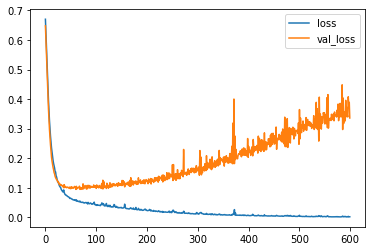

In [32]:
losses.plot()

In [39]:
model = Sequential()
model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(1,activation='sigmoid')) #binary classification
model.compile(loss='binary_crossentropy',optimizer = 'adam')

In [40]:
from tensorflow.keras.callbacks import EarlyStopping

In [41]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [42]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),
         callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 0s 9ms/step - loss: 0.6853 - val_loss: 0.6705
Epoch 2/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6616 - val_loss: 0.6505
Epoch 3/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6381 - val_loss: 0.6236
Epoch 4/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6067 - val_loss: 0.5844
Epoch 5/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5619 - val_loss: 0.5321
Epoch 6/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5062 - val_loss: 0.4679
Epoch 7/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4452 - val_loss: 0.4090
Epoch 8/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3905 - val_loss: 0.3537
Epoch 9/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3420 - val_loss: 0.3092
Epoch 10/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3025 - val_loss: 0.2745
Epoch 11/

In [43]:
model = Sequential()
model.add(Dense(30,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(15,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid')) #binary classification
model.compile(loss='binary_crossentropy',optimizer = 'adam')

In [44]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),
         callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 0s 9ms/step - loss: 0.6672 - val_loss: 0.6463
Epoch 2/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6615 - val_loss: 0.6258
Epoch 3/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6354 - val_loss: 0.6038
Epoch 4/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6137 - val_loss: 0.5775
Epoch 5/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5942 - val_loss: 0.5493
Epoch 6/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5661 - val_loss: 0.5176
Epoch 7/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5347 - val_loss: 0.4823
Epoch 8/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5155 - val_loss: 0.4482
Epoch 9/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5092 - val_loss: 0.4210
Epoch 10/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4844 - val_loss: 0.3954
Epoch 11/

In [46]:
model_loss = pd.DataFrame(model.history.history)

<AxesSubplot:>

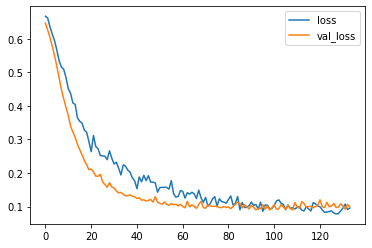

In [47]:
model_loss.plot()

In [49]:
predictions = model.predict_classes(X_test)

In [50]:
from sklearn.metrics import classification_report,confusion_matrix

In [51]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        55
           1       0.99      0.98      0.98        88

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [52]:
print(confusion_matrix(y_test,predictions))

[[54  1]
 [ 2 86]]
